Diese Aufgabe soll das globale Schwellenwertverfahren mit dem Region Growing vergleichen.

Dazu laden wir eine Karte von Hamburg, in der die Stadtteile mit unterschiedlichen Helligkeiten markiert sind. Ziel unserer Binarisierung soll es sein, den weißen Hintergrund (Gebiete außerhalb Hamburgs) und den Bereich der Stadt Hamburg zu trennen.

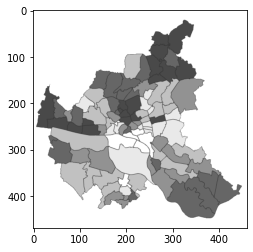

In [1]:
from skimage.io import imread
from skimage.segmentation import flood, mark_boundaries
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import numpy as np

img = imread('hamburg.png')
plt.imshow(img, cmap='gray', vmin=0,vmax=255)

Ermittelt zunächst einen Schwellenwert über Otsu und binarisiert das Bild damit. Lasst euch das Ergebnis anzeigen. Entspricht es unserer Zielvorstellung?

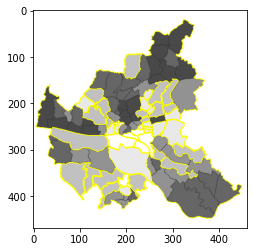

In [2]:
thres = threshold_otsu(img)
label = img>thres

vis = mark_boundaries(img, label, mode="thick")
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()

Wendet nun statt des Schwellenwertverfahrens das Region Growing an. Welche Koordinaten kommen als Saatpunkt in Frage? Wie groß sollte die `tolerance` sein? Visualisiert das Ergebnis? Entspricht es nun unserer Zielvorstellung?

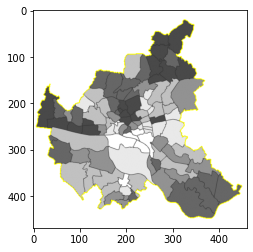

In [3]:
seed = (0,0)
myTolerance = 0
label = flood(img, seed_point=seed, tolerance=myTolerance)
vis = mark_boundaries(img, label, mode="thick")
plt.imshow(vis,cmap="gray",vmin=0,vmax=255)
plt.show()

Erstellt nun einen Ausschnitt des eigentlichen Bildes, indem die ersten und letzten 20 Bildzeilen und Bildspalten entfernt werden. Verändert sich das Ergebnis, wenn ihr nun wiederum mit dem gleichen Saatpunkt startet?

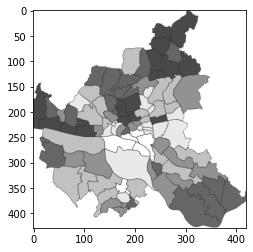

In [4]:
croped = img[20:-20,20:-20]
plt.imshow(croped, cmap="gray",vmin=0,vmax=255)

Nehmt nun vier sinnvoll platzierte Saatpunkt und erzeugt vier Einzelergebnisse zu dem Bildausschnitt jeweils mit Region Growing. Welche vier Saatpunkte wären sinnvoll? Wie könnt ihr die vier Einzelergebnisse zusammenbringen?

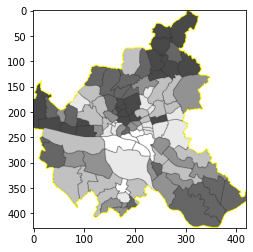

In [5]:
seeds = [(0,0),
         (0,croped.shape[1]-1),
         #(croped.shape[0]-1,croped.shape[1]-1),
         (croped.shape[0]-1,0)]
thres = 0
labels = []

for coord in seeds:
    labels += [flood(croped, seed_point=coord, tolerance=thres)]

res = np.zeros_like(croped)
for label in labels:
    res = res+label


#plt.imshow(res, cmap="gray", vmin=0, vmax=1)

vis = mark_boundaries(croped, res, mode="thick")

plt.imshow(vis, cmap="gray", vmin=0, vmax=255)